Jakub Zaręba


### Zaimportowanie potrzebnych bibliotek, definicja funkcji do wyświetlania macierzy, wczytanie danych i ich przygotowanie

In [2]:
%matplotlib inline
from IPython.display import display, Math, Latex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def LatexMatrix(matrix):
    ltx = r"\left[\begin{array}"
    m, n = matrix.shape
    ltx += "{" + ("r" * n) + "}"
    for i in range(m):
        ltx += r" & ".join([("%.4f" % j.item()) for j in matrix[i]]) + r" \\ "
    ltx += r"\end{array}\right]"
    return ltx


In [3]:
data=pd.read_csv("fires_thefts.csv", names=["x","y"])
data_array=data.to_numpy()
x=data_array[:,0]
y=data_array[:,1]

Funkcja hipotezy

In [4]:
def h(theta, x):
    return theta[0] + theta[1] * x

Funkcja kosztu:

In [5]:
def J(h, theta, x, y):
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i]) ** 2 for i in range(m))

### PUNKT A

##### Obliczenie parametrów θ dla α 0.001 oraz eps=0.001

In [6]:
def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    history = [
        [current_cost, theta]
    ] 
    m = len(y)
    while True:
        new_theta = [
            theta[0] - alpha / float(m) * sum(h(theta, x[i]) - y[i] for i in range(m)),
            theta[1]
            - alpha / float(m) * sum((h(theta, x[i]) - y[i]) * x[i] for i in range(m)),
        ]
        theta = new_theta
        try:
            prev_cost = current_cost
            current_cost = cost_fun(h, theta, x, y)
        except OverflowError:
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        if prev_cost<current_cost:
            print("Blad dzialania algorytmu, wartosc urosla zamiast malec")
            return [0,0],[0]
        history.append([current_cost, theta])
    return theta, history

In [7]:
best_theta, history = gradient_descent(h, J, [0.0, 0.0], x, y,alpha=0.001, eps=0.001)
display(
    Math(
        r"\large\textrm{Wynik:}\quad \theta = "
        + LatexMatrix(np.matrix(best_theta).reshape(2, 1))
        + (r" \quad J(\theta) = %.4f" % history[-1][0])
        + r" \quad \textrm{po %d iteracjach}" % len(history)
    )
)

<IPython.core.display.Math object>

##### Dobierzemy teraz odpowiednie wartości α oraz eps, by wyważyć czas działania algorytmu oraz dokładność.

In [8]:
import time

In [9]:
theta_start = [0,0]

epss = [10.0**n for n in range(-7, 0)]
costs = []
lengths = []
for eps in epss:
    start_time=time.time()
    theta_best, history = gradient_descent(
        h, J, theta_start, x, y, alpha=0.0001, eps=eps
    )
    end_time=time.time()
    cost = history[-1][0]
    steps = len(history)
    print(f"eps: {eps}, Koszt: {cost},  Liczba krokow: {steps}, Czas w sekundach: {end_time-start_time}")
    costs.append(cost)
    lengths.append(steps)

eps: 1e-07, Koszt: 180.41146460466078,  Liczba krokow: 145897, Czas w sekundach: 8.36998701095581
eps: 1e-06, Koszt: 180.42394173556022,  Liczba krokow: 113975, Czas w sekundach: 6.422645092010498
eps: 1e-05, Koszt: 180.5487189757947,  Liczba krokow: 82052, Czas w sekundach: 5.077371597290039
eps: 0.0001, Koszt: 181.7964406899394,  Liczba krokow: 50130, Czas w sekundach: 2.862614393234253
eps: 0.001, Koszt: 194.2742509595011,  Liczba krokow: 18207, Czas w sekundach: 1.0805370807647705
eps: 0.01, Koszt: 231.47469006642035,  Liczba krokow: 166, Czas w sekundach: 0.009674549102783203
eps: 0.1, Koszt: 233.45304199064705,  Liczba krokow: 113, Czas w sekundach: 0.005639553070068359


In [10]:
def eps_cost_steps_plot(eps, costs, steps):
    """Wykres kosztu i liczby kroków w zależności od eps"""
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(eps, steps, "--s", color="green")
    ax2.plot(eps, costs, ":o", color="orange")
    ax1.set_xscale("log")
    ax1.set_xlabel("eps")
    ax1.set_ylabel("liczba kroków", color="green")
    ax2.set_ylabel("koszt", color="orange")
    plt.show()


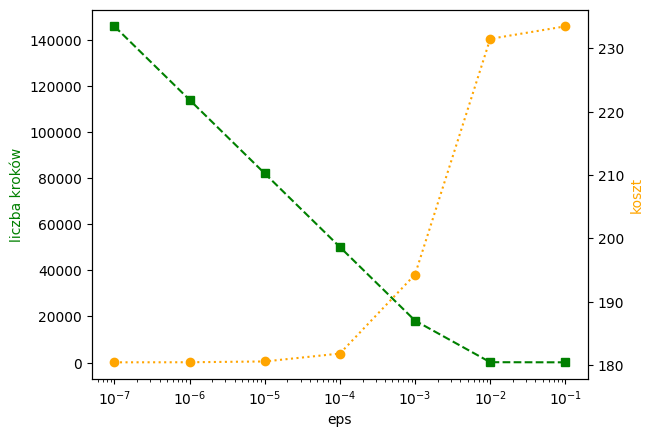

In [11]:
eps_cost_steps_plot(epss,costs,lengths)

#### Według wykresu widzimy, że dla eps=10^-4 otrzymujemy dosyć dokładny wynik, a ilość kroków jest do zaakceptowania. Dla eps=10^-3 widzimy już dosyć dużą rozbieżność w wartości kosztu. 

In [12]:
best_eps=10**-4

In [13]:
theta_start = [0,0]

eps = best_eps
alphas=[10.0**n for n in range(-6, -2)]
costs = []
lengths = []
for alpha in alphas:
    start_time=time.time()
    theta_best, history = gradient_descent(
        h, J, theta_start, x, y, alpha=alpha, eps=eps
    )
    end_time=time.time()
    cost = history[-1][0]
    steps = len(history)
    print(f"alpha: {alpha}, Koszt: {cost},  Liczba krokow: {steps}, Czas w sekundach: {end_time-start_time}")
    costs.append(cost)
    lengths.append(steps)

alpha: 1e-06, Koszt: 231.4649914332722,  Liczba krokow: 16731, Czas w sekundach: 0.9764454364776611
alpha: 1e-05, Koszt: 194.27404643208465,  Liczba krokow: 182066, Czas w sekundach: 10.39187240600586
alpha: 0.0001, Koszt: 181.7964406899394,  Liczba krokow: 50130, Czas w sekundach: 2.984300374984741
alpha: 0.001, Koszt: 180.5486958009126,  Liczba krokow: 8205, Czas w sekundach: 0.5077066421508789


In [14]:
def alpha_cost_steps_plot(alpha, costs, steps):
    """Wykres kosztu i liczby kroków w zależności od alpha"""
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(alpha, steps, "--s", color="green")
    ax2.plot(alpha, costs, ":o", color="orange")
    ax1.set_xscale("log")
    ax1.set_xlabel("alpha")
    ax1.set_ylabel("liczba kroków", color="green")
    ax2.set_ylabel("koszt", color="orange")
    plt.show()


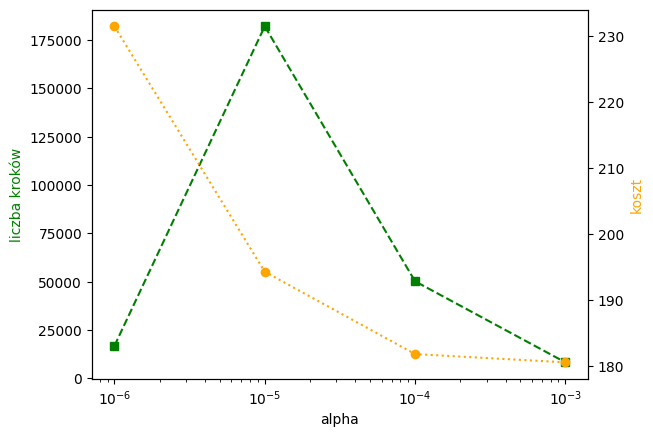

In [15]:
alpha_cost_steps_plot(alphas,costs,lengths)

#### Zatem najlepszym α jest alpha=10^-3

Skoro wybraliśmy wartość eps oraz α obliczmy jeszcze raz tym razem dla tych dwóch wybranych wartości argumentów parametry θ.

In [16]:
best_alpha=10**-3

In [17]:
theta_best, history = gradient_descent(
        h, J, theta_start, x, y, alpha=best_alpha, eps=best_eps
    )
display(
    Math(
        r"\large\textrm{Wynik:}\quad \theta = "
        + LatexMatrix(np.matrix(best_theta).reshape(2, 1))
        + (r" \quad J(\theta) = %.4f" % history[-1][0])
        + r" \quad \textrm{po %d iteracjach}" % len(history)
    )
)

<IPython.core.display.Math object>

#### Wykorzystując uzyskaną krzywą regresyjną przepowiemy liczbę włamań na tysiąc mieszkańców dla dzielnicy, w której występuje średnio 50, 100, 200 pożarów na tysiąc gospodarstw domowych.

In [19]:
for i in [50,100,200]:
    print(f"Dla {i} pożarów na tysiąc gospodarstw domowych model przewiduje: {h(best_theta, i)} włamań")

Dla 50 pożarów na tysiąc gospodarstw domowych model przewiduje: 86.87183634770264 włamań
Dla 100 pożarów na tysiąc gospodarstw domowych model przewiduje: 159.51685404647884 włamań
Dla 200 pożarów na tysiąc gospodarstw domowych model przewiduje: 304.80688944403124 włamań
